# **STAT6289**
### 03/22/2022
### Yi Nie

**Introduction**

In this project, three models are trained to build the clothes classifier. In addition, The accuracy of prediction on test set of three models are also compared. Finally, pictures from Amazon goods are used for testing the CNN model. 

**Load and normalize the Data**

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [59]:
# Normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
batch_size = 64

# Load the trainset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Load the testset
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

**Show one batch-size data**

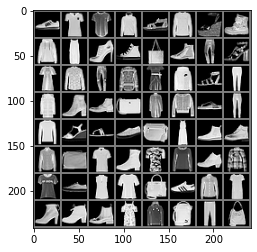

Sneaker T-shirt/top T-shirt/top Coat  Sandal Pullover Sandal Ankle Boot Pullover Dress Ankle Boot Sneaker Bag   Ankle Boot Trouser Sandal Dress Shirt Trouser Shirt Dress Coat  Sandal Trouser Coat  Ankle Boot Ankle Boot Bag   Dress Pullover Sandal Trouser Pullover Sandal Sandal Sneaker Bag   Dress Ankle Boot Ankle Boot Shirt Bag   T-shirt/top Ankle Boot T-shirt/top Shirt Ankle Boot Shirt T-shirt/top Sneaker Shirt T-shirt/top Bag   Sneaker Shirt Dress Ankle Boot Ankle Boot Ankle Boot Dress Pullover Bag   Trouser Bag  


In [102]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**Model with 5 Linear Layers**

Training loss: 1.9413679983697212
Training loss: 0.7517161656544407
Training loss: 0.5866235099367495
Training loss: 0.5179090811880921
Training loss: 0.4696320516786087
Training loss: 0.43538666686523697
Training loss: 0.4116389459130098
Training loss: 0.39174403286755466
Training loss: 0.37396405306833386
Training loss: 0.35959658662139227
Training loss: 0.3447180967738252
Training loss: 0.3335016291818893
Training loss: 0.32456558304173605
Training loss: 0.315538926459134
Training loss: 0.3055680991807726
Training loss: 0.29662721646206974
Training loss: 0.29076919488624725
Training loss: 0.28181396197599135
Training loss: 0.2735510453152885
Training loss: 0.2669314063831306
Training loss: 0.26166738151137764
Training loss: 0.2530822406318396
Training loss: 0.24952230404720885
Training loss: 0.24435498500302402
Training loss: 0.2375247244324003
Training loss: 0.22994990717532285
Training loss: 0.22697205731927206
Training loss: 0.21987193502358662
Training loss: 0.21667612559680363


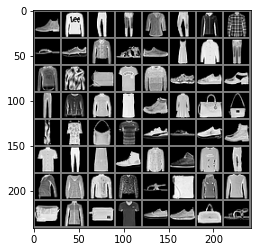

GroundTruth:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sneaker Dress Coat  Trouser Pullover Coat  Bag   T-shirt/top Pullover Sandal Sneaker Ankle Boot Trouser Coat  Shirt T-shirt/top Ankle Boot Dress Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot Shirt Trouser Dress Sneaker Shirt Sneaker Pullover Trouser Pullover Pullover Coat  Coat  Sandal Bag   Pullover Pullover Bag   Coat  Bag   T-shirt/top Sneaker Sneaker Bag   Sandal
Predicted:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sneaker Dress Pullover Trouser Pullover Pullover Bag   T-shirt/top Pullover Sandal Sneaker Sandal Trouser Pullover Shirt T-shirt/top Ankle Boot Dress Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot T-shirt/top Trouser Dress Sneaker Shirt Sneaker Pullover Trouser Pullover Pullover Coat  Pullover Sandal Bag   Pullover Pullover Bag   Pullover Bag   T-shirt/top Sneake

In [86]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      nn.Linear(392,196),
                      nn.ReLU(),
                      nn.Linear(196,98),
                      nn.ReLU(),
                      nn.Linear(98,49),
                      nn.ReLU(),
                      nn.Linear(49,10),
                      nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.layer(x)
        return x

net = Net()

# Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the Model
acc_5l = []
for epoch in range(30):  
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:    
        print(f"Training loss: {running_loss/len(trainloader)}")
        running_loss = 0.0


    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_5l.append(acc)
print('Finished Training')

# Save the model. 
PATH5 = './fashion5_net.pth'
torch.save(net.state_dict(), PATH5)

# Test on one batch-size data
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

net = Net()
net.load_state_dict(torch.load(PATH5))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(64)))

# Test on the whole testset
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# Show the accuracy on each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')







**Model with 3 Linear Layers**

Training loss: 1.7654874566267293
Training loss: 1.079145027820998
Training loss: 0.9198223664117521
Training loss: 0.8729081233617848
Training loss: 0.8474398039932698
Training loss: 0.8297658313248457
Training loss: 0.8150489579068064
Training loss: 0.8034324164647283
Training loss: 0.7937043058211362
Training loss: 0.78503305371255
Training loss: 0.7770291410211815
Training loss: 0.7534469587843555
Training loss: 0.5883807625407095
Training loss: 0.5685311625443542
Training loss: 0.5589067240291313
Training loss: 0.5496525274061445
Training loss: 0.5416744921062546
Training loss: 0.5352730201219699
Training loss: 0.5293511336705069
Training loss: 0.5246681385298273
Training loss: 0.519231140152859
Training loss: 0.5150303429187234
Training loss: 0.5093084977411512
Training loss: 0.5045858378698831
Training loss: 0.5006786471109654
Training loss: 0.49638845121809666
Training loss: 0.4917353973555158
Training loss: 0.48806720111034574
Training loss: 0.4845859356431056
Training loss: 0

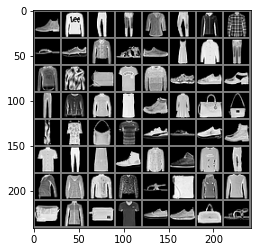

GroundTruth:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sneaker Dress Coat  Trouser Pullover Coat  Bag   T-shirt/top Pullover Sandal Sneaker Ankle Boot Trouser Coat  Shirt T-shirt/top Ankle Boot Dress Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot Shirt Trouser Dress Sneaker Shirt Sneaker Pullover Trouser Pullover Pullover Coat  Coat  Sandal Bag   Pullover Pullover Bag   Coat  Bag   T-shirt/top Sneaker Sneaker Bag   Sandal
Predicted:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sneaker Dress Coat  Trouser Pullover Pullover Bag   Shirt Pullover Sandal Sneaker Sandal Trouser Pullover Shirt Dress Ankle Boot Dress Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot Shirt Trouser Shirt Sneaker Shirt Sneaker Pullover Trouser Pullover Shirt Coat  Pullover Sandal Bag   Pullover Pullover Bag   Coat  Bag   T-shirt/top Sneaker Sneaker Bag   Sandal
Accu

In [88]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.ReLU(),
                      nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.layer(x)
        return x

net = Net()

# Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the Model
acc_3l = []
for epoch in range(30):  
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:    
        print(f"Training loss: {running_loss/len(trainloader)}")
        running_loss = 0.0


    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_3l.append(acc)
print('Finished Training')

# Save the model. 
PATH3 = './fashion3_net.pth'
torch.save(net.state_dict(), PATH3)

# Test on one batch-size data
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

net = Net()
net.load_state_dict(torch.load(PATH3))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(64)))

# Test on the whole testset
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# Show the accuracy on each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')







**CNN**

Training loss: 1.6879315718150596
Training loss: 0.6824406588128381
Training loss: 0.5688114200256018
Training loss: 0.5096323215948747
Training loss: 0.4690167030958987
Training loss: 0.4376068678396597
Training loss: 0.40871214075510437
Training loss: 0.38907545021792717
Training loss: 0.3709127364604712
Training loss: 0.3559614995808235
Training loss: 0.3416713137330531
Training loss: 0.3306322691362423
Training loss: 0.32079967256706915
Training loss: 0.3123088961900043
Training loss: 0.3038869114128003
Training loss: 0.29660059402047445
Training loss: 0.2892117124122343
Training loss: 0.2830595659024553
Training loss: 0.2774659478143334
Training loss: 0.27200026937258015
Training loss: 0.26674187130558846
Training loss: 0.26077449941304703
Training loss: 0.2577221286433465
Training loss: 0.252697098753981
Training loss: 0.2497446641707217
Training loss: 0.24385000617582914
Training loss: 0.24153594296973652
Training loss: 0.23618920566017693
Training loss: 0.2335183384147153
Train

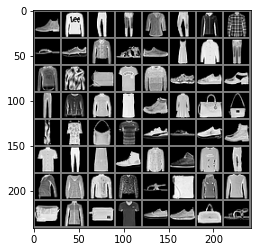

GroundTruth:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sneaker Dress Coat  Trouser Pullover Coat  Bag   T-shirt/top Pullover Sandal Sneaker Ankle Boot Trouser Coat  Shirt T-shirt/top Ankle Boot Dress Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot Shirt Trouser Dress Sneaker Shirt Sneaker Pullover Trouser Pullover Pullover Coat  Coat  Sandal Bag   Pullover Pullover Bag   Coat  Bag   T-shirt/top Sneaker Sneaker Bag   Sandal
Predicted:  Ankle Boot Pullover Trouser Trouser Shirt Trouser Coat  Shirt Sandal Sneaker Coat  Sandal Sandal Dress Coat  Trouser Pullover Pullover Bag   T-shirt/top Pullover Sandal Sneaker Sandal Trouser Pullover Shirt T-shirt/top Ankle Boot Coat  Bag   Bag   Dress Dress Bag   T-shirt/top Sneaker Sandal Sneaker Ankle Boot T-shirt/top Trouser Shirt Ankle Boot Shirt Sneaker Pullover Trouser Pullover Shirt Coat  Shirt Sandal Bag   Pullover Pullover Bag   Shirt Bag   T-shirt/top Sneaker Sneaker 

In [100]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 25, 5)
        self.fc1 = nn.Linear(25 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Define a Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the Model
acc_cnn = []
for epoch in range(30):  
    test_accs = []
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:    
        print(f"Training loss: {running_loss/len(trainloader)}")
        running_loss = 0.0


    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    acc_cnn.append(acc)
print('Finished Training')

# Save the model. 
PATHC = './fashionc_net.pth'
torch.save(net.state_dict(), PATHC)

# Test on one batch-size data
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

net = Net()
net.load_state_dict(torch.load(PATHC))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(64)))

# Test on the whole testset
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# Show the accuracy on each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')







**Plot the accuracy on testset**

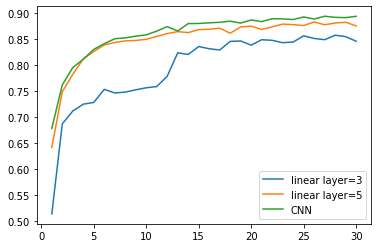

In [158]:
epochlist = np.arange(1,31,1)
plt.plot(epochlist,acc_3l,label = 'linear layer=3')
plt.plot(epochlist,acc_5l,label = 'linear layer=5')
plt.plot(epochlist,acc_cnn,label = 'CNN')
plt.legend()
plt.savefig('accurracyoutput.png')

In the plot above, we can clearly see the advantages of CNN. 

**Test CNN on amazon pictures**

In [143]:
import os
from PIL import Image

def get_data(dic):
    return [os.path.join(dic,f) for f in sorted(list(os.listdir(dic)))
            if os.path.isfile(os.path.join(dic,f))]
    


images = np.array([])
testimg = get_data('./testimg')

for i,item in enumerate(testimg):
    image = transform(Image.open(item).convert('L'))
    images = np.append(images,image.numpy())
    
img = images.reshape(-1,1,28,28)
img = torch.from_numpy(img).float()


In [155]:
net = Net()
net.load_state_dict(torch.load(PATHC))
    
testc = net(img)
print(testc)
print(torch.max(testc, 1))




tensor([[  1.5005,   6.1518,   2.0421,   4.4631,   5.5473, -10.2336,   2.2186,
          -4.6268,  -1.1426,  -9.6130],
        [  9.2515,  -5.4679,   3.7656,   3.6208,  -0.9517,  -4.6649,   6.4382,
          -7.6343,   0.8264,  -4.0560],
        [  2.8577,  -6.8831,   1.7369,  -5.1698,  -6.1850,  10.1531,  -0.7245,
           3.2163,  -1.7664,   6.9410]], grad_fn=<AddmmBackward0>)
torch.return_types.max(
values=tensor([ 6.1518,  9.2515, 10.1531], grad_fn=<MaxBackward0>),
indices=tensor([1, 0, 5]))
